In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt 

In [2]:
plt.style.use('seaborn-deep')

# SF Crime

In [3]:
df = pd.read_csv('crime.csv')

In [4]:
df.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location
0,110914565,WARRANTS,WARRANT ARREST,Friday,05/29/2015 12:00:00 AM,16:42,SOUTHERN,"ARREST, BOOKED",BRYANT ST / 8TH ST,-122.406971,37.772527,"(37.7725273607571, -122.406970988225)"
1,120789988,MISSING PERSON,FOUND PERSON,Monday,05/16/2016 12:00:00 AM,00:41,INGLESIDE,NONE,WOOLSEY ST / UNIVERSITY ST,-122.412470,37.722659,"(37.7226585129212, -122.412469643631)"
2,150020821,ASSAULT,ELDER ADULT OR DEPENDENT ABUSE (NOT EMBEZZLEME...,Friday,01/02/2015 12:00:00 AM,12:00,NORTHERN,NONE,300 Block of FULTON ST,-122.422536,37.778796,"(37.7787958771466, -122.422536478306)"
3,150020978,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Wednesday,01/07/2015 12:00:00 AM,19:21,CENTRAL,"ARREST, BOOKED",MONTGOMERY ST / CHESTNUT ST,-122.405178,37.804764,"(37.80476375718, -122.405178220847)"
4,150020984,ROBBERY,ROBBERY OF A CHAIN STORE WITH A DANGEROUS WEAPON,Wednesday,01/07/2015 12:00:00 AM,19:27,SOUTHERN,NONE,1100 Block of MARKET ST,-122.413564,37.779514,"(37.779514030063, -122.413564091744)"


In [5]:
df.columns

Index(['IncidntNum', 'Category', 'Descript', 'DayOfWeek', 'Date', 'Time',
       'PdDistrict', 'Resolution', 'Address', 'X', 'Y', 'Location'],
      dtype='object')

## 1) What different types of incidents are there? How frequently has each type occurred?

In [6]:
df['Category'].describe()

count           1922818
unique               39
top       LARCENY/THEFT
freq             394046
Name: Category, dtype: object

There are 39 different types of incidents:

In [7]:
df['Category'].value_counts()

LARCENY/THEFT                  394046
OTHER OFFENSES                 273803
NON-CRIMINAL                   205217
ASSAULT                        168344
VEHICLE THEFT                  115581
DRUG/NARCOTIC                  112540
VANDALISM                       98064
WARRANTS                        91334
BURGLARY                        80167
SUSPICIOUS OCC                  69020
MISSING PERSON                  56545
ROBBERY                         49417
FRAUD                           36546
SECONDARY CODES                 22029
FORGERY/COUNTERFEITING          21965
WEAPON LAWS                     18895
TRESPASS                        16190
PROSTITUTION                    15803
STOLEN PROPERTY                 10306
SEX OFFENSES, FORCIBLE           9774
DRUNKENNESS                      9145
DISORDERLY CONDUCT               9114
RECOVERED VEHICLE                7597
DRIVING UNDER THE INFLUENCE      5042
KIDNAPPING                       4906
RUNAWAY                          4027
LIQUOR LAWS 

New questions: What do these mean?
* Other offenses
* Non-criminal
* Warrants
* Suspicious occ
* Secondary codes
* Forgery/counterfeiting
* Weapon laws
* Family offenses
* Sex offenses, non forcible
* Trea

### Other Offenses

In [8]:
df[df['Category'] == 'OTHER OFFENSES']['Descript'].value_counts()

DRIVERS LICENSE, SUSPENDED OR REVOKED                                        58420
TRAFFIC VIOLATION                                                            34748
RESISTING ARREST                                                             19066
MISCELLANEOUS INVESTIGATION                                                  17897
PROBATION VIOLATION                                                          16627
LOST/STOLEN LICENSE PLATE                                                    14344
VIOLATION OF RESTRAINING ORDER                                               12297
TRAFFIC VIOLATION ARREST                                                     12250
PAROLE VIOLATION                                                             10260
CONSPIRACY                                                                    6650
FALSE PERSONATION TO RECEIVE MONEY OR PROPERTY                                6061
OBSCENE PHONE CALLS(S)                                                        5274
VIOL

#### Fun Observations:
* Since 2003, there have been more incidents of “danger of leading immoral life” (948) than "reckless driving" (938).
* Most "other offenses" are traffic related.
* In SF, some offenses are probaby difficult to categorize: such as "escape from hospital with force" (2) and "wearing the apparel of opposite sex to deceive"(2) (hello, Robert Durst?).

### Non-Criminal

In [9]:
df[df['Category'] == 'NON-CRIMINAL']['Descript'].value_counts()

LOST PROPERTY                                         68780
AIDED CASE, MENTAL DISTURBED                          47961
FOUND PROPERTY                                        27644
AIDED CASE                                            12013
DEATH REPORT, CAUSE UNKNOWN                            9401
CASE CLOSURE                                           5386
STAY AWAY OR COURT ORDER, NON-DV RELATED               3587
AIDED CASE, DOG BITE                                   3011
CIVIL SIDEWALKS, CITATION                              2807
PROPERTY FOR IDENTIFICATION                            2608
AIDED CASE, INJURED PERSON                             2310
COURTESY REPORT                                        2178
CIVIL SIDEWALKS, WARNING                               2124
DEATH REPORT, NATURAL CAUSES                           2089
AIDED CASE -PROPERTY FOR DESTRUCTION                   2021
FIRE REPORT                                            1745
LOCATED PROPERTY                        

## 3) Group by year and make graphs for each.

In [10]:
df['Date'].str.replace(' 12:00:00 AM', '').str[-4:].value_counts()

2015    156007
2013    152811
2014    150150
2003    149176
2004    148148
2005    142186
2008    141311
2012    140856
2009    139860
2006    137853
2007    137639
2010    133525
2011    132699
2016     60597
Name: Date, dtype: int64

In [11]:
df['Year'] = df['Date'].str.replace(' 12:00:00 AM', '').str[-4:]

2003
LARCENY/THEFT     26393
OTHER OFFENSES    21232
VEHICLE THEFT     15325
ASSAULT           13461
NON-CRIMINAL      13149
Name: Category, dtype: int64
2004
LARCENY/THEFT     24505
OTHER OFFENSES    20710
VEHICLE THEFT     17884
NON-CRIMINAL      13778
ASSAULT           12899
Name: Category, dtype: int64
2005
LARCENY/THEFT     25319
VEHICLE THEFT     18194
OTHER OFFENSES    17834
NON-CRIMINAL      14055
ASSAULT           11601
Name: Category, dtype: int64
2006
LARCENY/THEFT     27352
OTHER OFFENSES    18306
NON-CRIMINAL      13368
ASSAULT           12449
DRUG/NARCOTIC      9069
Name: Category, dtype: int64
2007
LARCENY/THEFT     25770
OTHER OFFENSES    19763
NON-CRIMINAL      12677
ASSAULT           12518
DRUG/NARCOTIC     10560
Name: Category, dtype: int64
2008
LARCENY/THEFT     25807
OTHER OFFENSES    23457
ASSAULT           12681
NON-CRIMINAL      12303
DRUG/NARCOTIC     11648
Name: Category, dtype: int64
2009
LARCENY/THEFT     25585
OTHER OFFENSES    24693
NON-CRIMINAL      12395

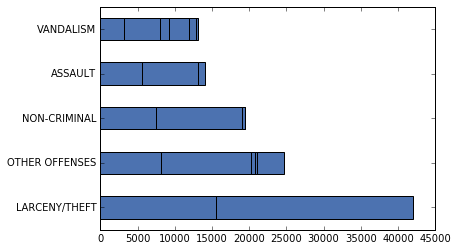

In [12]:
# The way that's not working for me.
# incorrect way # 1
years = list(range(2003, 2017))
for year in years:
    print(year)
    print(df[df['Year'] == str(year)]['Category'].value_counts().head())
    values = df[df['Year'] == str(year)]['Category'].value_counts().head()
    values.plot(kind = 'barh')

### Larceny/Theft

2003
LARCENY/THEFT     26393
OTHER OFFENSES    21232
VEHICLE THEFT     15325
ASSAULT           13461
NON-CRIMINAL      13149
Name: Category, dtype: int64
2004
LARCENY/THEFT     24505
OTHER OFFENSES    20710
VEHICLE THEFT     17884
NON-CRIMINAL      13778
ASSAULT           12899
Name: Category, dtype: int64
2005
LARCENY/THEFT     25319
VEHICLE THEFT     18194
OTHER OFFENSES    17834
NON-CRIMINAL      14055
ASSAULT           11601
Name: Category, dtype: int64
2006
LARCENY/THEFT     27352
OTHER OFFENSES    18306
NON-CRIMINAL      13368
ASSAULT           12449
DRUG/NARCOTIC      9069
Name: Category, dtype: int64
2007
LARCENY/THEFT     25770
OTHER OFFENSES    19763
NON-CRIMINAL      12677
ASSAULT           12518
DRUG/NARCOTIC     10560
Name: Category, dtype: int64
2008
LARCENY/THEFT     25807
OTHER OFFENSES    23457
ASSAULT           12681
NON-CRIMINAL      12303
DRUG/NARCOTIC     11648
Name: Category, dtype: int64
2009
LARCENY/THEFT     25585
OTHER OFFENSES    24693
NON-CRIMINAL      12395

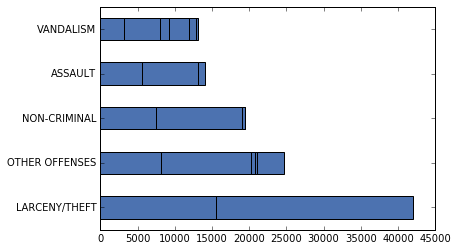

In [13]:
# incorrect way # 2 
years = list(range(2003, 2017))
for year in years:
    print(year)
    print(df[df['Year'] == str(year)]['Category'].value_counts().head())
    values = df[df['Year'] == str(year)]['Category'].value_counts().head()
    values_dict = df[df['Year'] == str(year)]['Category'].value_counts().head().to_dict()
    values.plot(kind = 'barh', x = values_dict.keys(), y = values_dict.values())

In [14]:
# incorrect way # 3
# LARCENY/THEFT

larceny_list = {}
for item in df[(df['Year'] == str(2003)) & (df['Category'] == 'LARCENY/THEFT')]['Category'].value_counts():
    larceny_list[2003] = item

larceny_list

# years = list(range(2003, 2017))
# for year in years:
#     print(year)
#     print(df[df['Year'] == str(year)]['Category'].value_counts().head())
#     values = df[df['Year'] == str(year)]['Category'].value_counts().head()
#     values.plot(kind = 'barh')

{2003: 26393}

In [15]:
larceny_dict = {}
larceny_list = []
years = list(range(2003, 2017))

for year in years:
    for item in df[(df['Year'] == str(year)) & (df['Category'] == 'LARCENY/THEFT')]['Category'].value_counts():
        larceny_dict[year] = item
        print('This is', year, 'dictionary:', larceny_dict)
        larceny_list.append(larceny_dict)
        larceny_dict = {}

## Why doesn't this work??
# [[larceny_dict[year] = item for item in df[(df['Year'] == str(year)) & (df['Category'] == 'LARCENY/THEFT')]['Category'].value_counts()] for year in years]  

larceny_list

This is 2003 dictionary: {2003: 26393}
This is 2004 dictionary: {2004: 24505}
This is 2005 dictionary: {2005: 25319}
This is 2006 dictionary: {2006: 27352}
This is 2007 dictionary: {2007: 25770}
This is 2008 dictionary: {2008: 25807}
This is 2009 dictionary: {2009: 25585}
This is 2010 dictionary: {2010: 24446}
This is 2011 dictionary: {2011: 25905}
This is 2012 dictionary: {2012: 30976}
This is 2013 dictionary: {2013: 36412}
This is 2014 dictionary: {2014: 38005}
This is 2015 dictionary: {2015: 42012}
This is 2016 dictionary: {2016: 15559}


[{2003: 26393},
 {2004: 24505},
 {2005: 25319},
 {2006: 27352},
 {2007: 25770},
 {2008: 25807},
 {2009: 25585},
 {2010: 24446},
 {2011: 25905},
 {2012: 30976},
 {2013: 36412},
 {2014: 38005},
 {2015: 42012},
 {2016: 15559}]

In [16]:
larceny_df = pd.DataFrame(larceny_list)
larceny_df

,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,26393.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,24505.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,25319.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,27352.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,25770.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,25807.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,25585.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24446.0,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25905.0,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30976.0,NaN,NaN,NaN,NaN


In [17]:
# Figured it out!
# What I really want is Year: 2003 and Larceny_Theft: 26393
larceny_dict = {}
larceny_list = []
years = list(range(2003, 2017))

for year in years:
    for item in df[(df['Year'] == str(year)) & (df['Category'] == 'LARCENY/THEFT')]['Category'].value_counts():
        larceny_dict['Year'] = year
        larceny_dict['Larceny_theft'] = item
        print('This is', year, 'dictionary:', larceny_dict)
        larceny_list.append(larceny_dict)
        larceny_dict = {}

larceny_list

This is 2003 dictionary: {'Larceny_theft': 26393, 'Year': 2003}
This is 2004 dictionary: {'Larceny_theft': 24505, 'Year': 2004}
This is 2005 dictionary: {'Larceny_theft': 25319, 'Year': 2005}
This is 2006 dictionary: {'Larceny_theft': 27352, 'Year': 2006}
This is 2007 dictionary: {'Larceny_theft': 25770, 'Year': 2007}
This is 2008 dictionary: {'Larceny_theft': 25807, 'Year': 2008}
This is 2009 dictionary: {'Larceny_theft': 25585, 'Year': 2009}
This is 2010 dictionary: {'Larceny_theft': 24446, 'Year': 2010}
This is 2011 dictionary: {'Larceny_theft': 25905, 'Year': 2011}
This is 2012 dictionary: {'Larceny_theft': 30976, 'Year': 2012}
This is 2013 dictionary: {'Larceny_theft': 36412, 'Year': 2013}
This is 2014 dictionary: {'Larceny_theft': 38005, 'Year': 2014}
This is 2015 dictionary: {'Larceny_theft': 42012, 'Year': 2015}
This is 2016 dictionary: {'Larceny_theft': 15559, 'Year': 2016}


[{'Larceny_theft': 26393, 'Year': 2003},
 {'Larceny_theft': 24505, 'Year': 2004},
 {'Larceny_theft': 25319, 'Year': 2005},
 {'Larceny_theft': 27352, 'Year': 2006},
 {'Larceny_theft': 25770, 'Year': 2007},
 {'Larceny_theft': 25807, 'Year': 2008},
 {'Larceny_theft': 25585, 'Year': 2009},
 {'Larceny_theft': 24446, 'Year': 2010},
 {'Larceny_theft': 25905, 'Year': 2011},
 {'Larceny_theft': 30976, 'Year': 2012},
 {'Larceny_theft': 36412, 'Year': 2013},
 {'Larceny_theft': 38005, 'Year': 2014},
 {'Larceny_theft': 42012, 'Year': 2015},
 {'Larceny_theft': 15559, 'Year': 2016}]

In [18]:
larceny_df = pd.DataFrame(larceny_list)
larceny_df

,Larceny_theft,Year
0,26393,2003
1,24505,2004
2,25319,2005
3,27352,2006
4,25770,2007
5,25807,2008
6,25585,2009
7,24446,2010
8,25905,2011
9,30976,2012


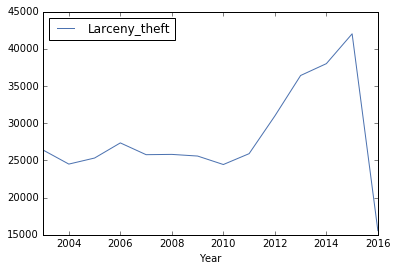

In [19]:
larceny_df.plot(kind = 'line', x = 'Year', y = 'Larceny_theft')

## Other Offenses

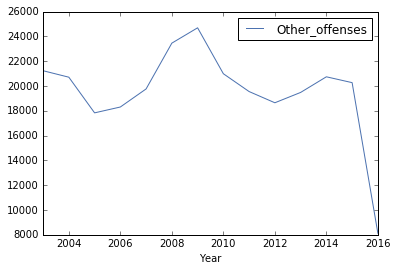

In [20]:
other_dict = {}
other_list = []
years = list(range(2003, 2017))

for year in years:
    for item in df[(df['Year'] == str(year)) & (df['Category'] == 'OTHER OFFENSES')]['Category'].value_counts():
        other_dict['Year'] = year
        other_dict['Other_offenses'] = item
        other_list.append(other_dict)
        other_dict = {}

other_df = pd.DataFrame(other_list)
other_df.plot(kind = 'line', x = 'Year', y = 'Other_offenses')

### Trying It With Variables

In [21]:
## I need:
## {'Year}: 2006, 'VEHICLE THEFT': 7291, 'ASSAULT': 12449...
top_categories = ['VEHICLE THEFT', 'ASSAULT', 'NON-CRIMINAL', 'DRUG/NARCOTIC', 'WARRANTS', 'VANDALISM']

var_dict = {}
var_list = []
years = list(range(2003, 2017))

for year in years:
    var_dict['Year'] = year
    for category in top_categories:
        for item in df[(df['Year'] == str(year)) & (df['Category'] == category)]['Category'].value_counts():
            var_dict[category] = item
    var_list.append(var_dict)
    var_dict = {}
var_list

[{'ASSAULT': 13461,
  'DRUG/NARCOTIC': 9917,
  'NON-CRIMINAL': 13149,
  'VANDALISM': 6448,
  'VEHICLE THEFT': 15325,
  'WARRANTS': 9079,
  'Year': 2003},
 {'ASSAULT': 12899,
  'DRUG/NARCOTIC': 9897,
  'NON-CRIMINAL': 13778,
  'VANDALISM': 6496,
  'VEHICLE THEFT': 17884,
  'WARRANTS': 8114,
  'Year': 2004},
 {'ASSAULT': 11601,
  'DRUG/NARCOTIC': 8533,
  'NON-CRIMINAL': 14055,
  'VANDALISM': 7013,
  'VEHICLE THEFT': 18194,
  'WARRANTS': 6708,
  'Year': 2005},
 {'ASSAULT': 12449,
  'DRUG/NARCOTIC': 9069,
  'NON-CRIMINAL': 13368,
  'VANDALISM': 7688,
  'VEHICLE THEFT': 7291,
  'WARRANTS': 6498,
  'Year': 2006},
 {'ASSAULT': 12518,
  'DRUG/NARCOTIC': 10560,
  'NON-CRIMINAL': 12677,
  'VANDALISM': 7566,
  'VEHICLE THEFT': 6460,
  'WARRANTS': 7105,
  'Year': 2007},
 {'ASSAULT': 12681,
  'DRUG/NARCOTIC': 11648,
  'NON-CRIMINAL': 12303,
  'VANDALISM': 7342,
  'VEHICLE THEFT': 6053,
  'WARRANTS': 5798,
  'Year': 2008},
 {'ASSAULT': 12284,
  'DRUG/NARCOTIC': 11950,
  'NON-CRIMINAL': 12395,
  'VAN

In [22]:
var_df = pd.DataFrame(var_list)
var_df

,ASSAULT,DRUG/NARCOTIC,NON-CRIMINAL,VANDALISM,VEHICLE THEFT,WARRANTS,Year
0,13461,9917,13149,6448,15325,9079,2003
1,12899,9897,13778,6496,17884,8114,2004
2,11601,8533,14055,7013,18194,6708,2005
3,12449,9069,13368,7688,7291,6498,2006
4,12518,10560,12677,7566,6460,7105,2007
5,12681,11648,12303,7342,6053,5798,2008
6,12284,11950,12395,7604,5183,5764,2009
7,12388,9205,13878,7934,4346,6187,2010
8,12281,6935,15586,7243,4762,6311,2011
9,12181,6445,16936,7808,6183,6300,2012


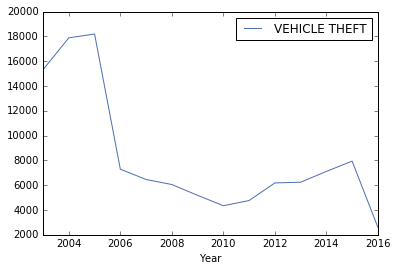

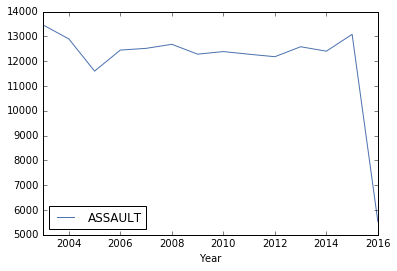

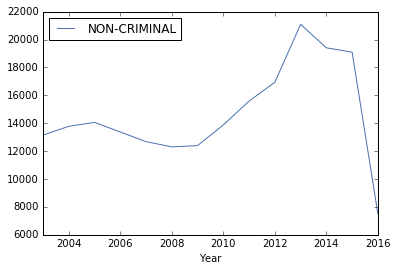

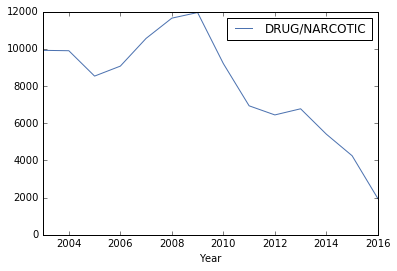

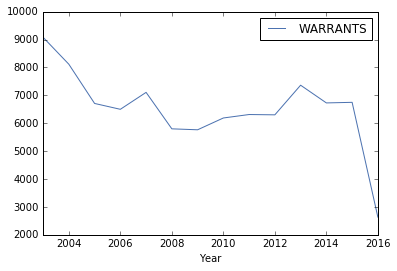

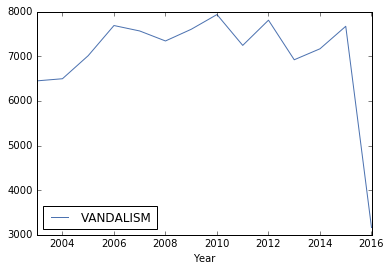

In [23]:
for category in top_categories:
    var_df.plot(kind = 'line', x = 'Year', y = category)

### Things That Have Changed Over The Years:
* Vehicle Theft
* Drug/Narcotics
* Vandalism
* Warrants (made a brief appearance)

## 4) Why the increase in non-criminal incidents?

In [24]:
df.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,Year
0,110914565,WARRANTS,WARRANT ARREST,Friday,05/29/2015 12:00:00 AM,16:42,SOUTHERN,"ARREST, BOOKED",BRYANT ST / 8TH ST,-122.406971,37.772527,"(37.7725273607571, -122.406970988225)",2015
1,120789988,MISSING PERSON,FOUND PERSON,Monday,05/16/2016 12:00:00 AM,00:41,INGLESIDE,NONE,WOOLSEY ST / UNIVERSITY ST,-122.412470,37.722659,"(37.7226585129212, -122.412469643631)",2016
2,150020821,ASSAULT,ELDER ADULT OR DEPENDENT ABUSE (NOT EMBEZZLEME...,Friday,01/02/2015 12:00:00 AM,12:00,NORTHERN,NONE,300 Block of FULTON ST,-122.422536,37.778796,"(37.7787958771466, -122.422536478306)",2015
3,150020978,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Wednesday,01/07/2015 12:00:00 AM,19:21,CENTRAL,"ARREST, BOOKED",MONTGOMERY ST / CHESTNUT ST,-122.405178,37.804764,"(37.80476375718, -122.405178220847)",2015
4,150020984,ROBBERY,ROBBERY OF A CHAIN STORE WITH A DANGEROUS WEAPON,Wednesday,01/07/2015 12:00:00 AM,19:27,SOUTHERN,NONE,1100 Block of MARKET ST,-122.413564,37.779514,"(37.779514030063, -122.413564091744)",2015


In [25]:
non_criminal_categories = df[df['Category'] == 'NON-CRIMINAL']['Descript'].value_counts().to_dict()
non_criminal_categories.keys()

dict_keys(['AIDED CASE, MENTAL DISTURBED', 'MISPLACED VEHICLE', 'AUTO IMPOUNDED', 'AIDED CASE', "MEGAN'S LAW NOTIFICATION", 'CIVIL SIDEWALKS, WARNING', 'FIRE REPORT', 'DEATH REPORT, CAUSE UNKNOWN', 'SEARCH WARRANT SERVICE', 'CASE CLOSURE', 'SHELTER', 'LICENSE PLATE, RECOVERED', 'AIDED CASE, INJURED PERSON', 'DEATH, ACCIDENTAL', 'DEATH REPORT, IN CUSTODY', 'TRUANT, HABITUAL', 'LOST PROPERTY', 'STAY AWAY OR COURT ORDER, NON-DV RELATED', 'TRAFFIC ACCIDENT', 'AIDED CASE, SICK PERSON', 'FOUND PROPERTY', 'LICENSE PLATE, FOUND', 'PROPERTY FOR IDENTIFICATION', 'ACCIDENTAL SHOOTING', 'CIVIL SIDEWALKS, BOOKING', 'AIDED CASE, DOG BITE', 'CIVIL SIDEWALKS, CITATION', 'LOCATED PROPERTY', 'IMPOUNDED VEHICLE', 'TURNED IN GUN', 'DEATH, NON-MANSLAUGHTER AUTO ACCIDENT', 'DEATH REPORT, NATURAL CAUSES', 'AIDED CASE -PROPERTY FOR DESTRUCTION', 'ACCIDENTAL BURNS', 'DEMONSTRATION, VIDEO EVIDENCE, MISC. INVESTIGATION', 'YOUTH COURT', 'CIVIL SIDEWALKS, VIOLATION', 'COURTESY REPORT', 'TARASOFF REPORT'])

In [26]:
## How to get categories that aren't listed to equal 0?
## I tried:
#             if item:
#                 non_crim_dict[category] = item
#             else:
#                 non_crim_dict[category] = 0
non_crim_dict = {}
non_crim_list = []
years = list(range(2003, 2017))

for year in years:
    non_crim_dict['Year'] = year
    for category in non_criminal_categories:
        for item in df[(df['Year'] == str(year)) & (df['Descript'] == category)]['Descript'].value_counts():
            non_crim_dict[category] = item
    non_crim_list.append(non_crim_dict)
    non_crim_dict = {}
non_crim_list

[{'ACCIDENTAL BURNS': 1,
  'ACCIDENTAL SHOOTING': 1,
  'AIDED CASE': 655,
  'AIDED CASE, DOG BITE': 200,
  'AIDED CASE, INJURED PERSON': 199,
  'AIDED CASE, MENTAL DISTURBED': 2407,
  'AIDED CASE, SICK PERSON': 22,
  'COURTESY REPORT': 115,
  'DEATH REPORT, CAUSE UNKNOWN': 741,
  'DEATH REPORT, NATURAL CAUSES': 242,
  'DEATH, ACCIDENTAL': 2,
  'DEATH, NON-MANSLAUGHTER AUTO ACCIDENT': 2,
  'FIRE REPORT': 114,
  'FOUND PROPERTY': 1255,
  'IMPOUNDED VEHICLE': 86,
  'LOCATED PROPERTY': 207,
  'LOST PROPERTY': 6239,
  'MISPLACED VEHICLE': 31,
  'PROPERTY FOR IDENTIFICATION': 230,
  'SHELTER': 147,
  'TARASOFF REPORT': 114,
  'TRAFFIC ACCIDENT': 67,
  'TURNED IN GUN': 67,
  'YOUTH COURT': 5,
  'Year': 2003},
 {'ACCIDENTAL SHOOTING': 5,
  'AIDED CASE': 629,
  'AIDED CASE, DOG BITE': 184,
  'AIDED CASE, INJURED PERSON': 178,
  'AIDED CASE, MENTAL DISTURBED': 2592,
  'AIDED CASE, SICK PERSON': 15,
  'COURTESY REPORT': 160,
  'DEATH REPORT, CAUSE UNKNOWN': 735,
  'DEATH REPORT, NATURAL CAUSES': 

In [27]:
non_crim_df = pd.DataFrame(non_crim_list)
non_crim_df

,ACCIDENTAL BURNS,ACCIDENTAL SHOOTING,AIDED CASE,AIDED CASE -PROPERTY FOR DESTRUCTION,"AIDED CASE, DOG BITE","AIDED CASE, INJURED PERSON","AIDED CASE, MENTAL DISTURBED","AIDED CASE, SICK PERSON",AUTO IMPOUNDED,CASE CLOSURE,...,PROPERTY FOR IDENTIFICATION,SEARCH WARRANT SERVICE,SHELTER,"STAY AWAY OR COURT ORDER, NON-DV RELATED",TARASOFF REPORT,TRAFFIC ACCIDENT,"TRUANT, HABITUAL",TURNED IN GUN,YOUTH COURT,Year
0,1.0,1.0,655,NaN,200,199,2407,22,NaN,NaN,...,230,NaN,147,NaN,114,67,NaN,67,5.0,2003
1,NaN,5.0,629,NaN,184,178,2592,15,NaN,NaN,...,236,NaN,109,NaN,122,52,NaN,80,1.0,2004
2,NaN,2.0,681,NaN,202,178,2924,26,NaN,NaN,...,203,NaN,74,NaN,114,57,NaN,84,NaN,2005
3,2.0,3.0,658,NaN,155,152,3134,26,NaN,4.0,...,179,NaN,76,1.0,139,81,NaN,60,1.0,2006
4,1.0,1.0,709,NaN,205,166,2970,24,NaN,7.0,...,241,NaN,67,NaN,117,95,NaN,74,NaN,2007
5,NaN,1.0,864,NaN,192,215,3317,31,NaN,9.0,...,171,1.0,59,NaN,99,99,NaN,70,3.0,2008
6,1.0,NaN,913,NaN,210,182,3418,22,NaN,18.0,...,131,NaN,45,5.0,76,110,NaN,68,4.0,2009
7,NaN,4.0,963,NaN,222,133,3845,23,2.0,52.0,...,186,1.0,22,665.0,101,55,9.0,101,5.0,2010
8,NaN,1.0,917,NaN,271,116,3775,24,2.0,130.0,...,245,4.0,29,811.0,90,45,21.0,91,2.0,2011
9,1.0,3.0,1345,37.0,270,134,3829,67,4.0,492.0,...,248,249.0,43,676.0,117,55,16.0,90,NaN,2012


/usr/local/lib/python3.5/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


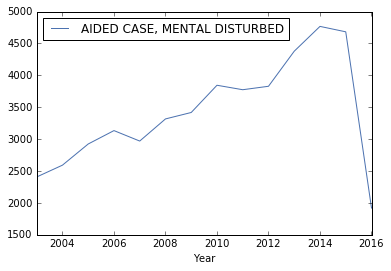

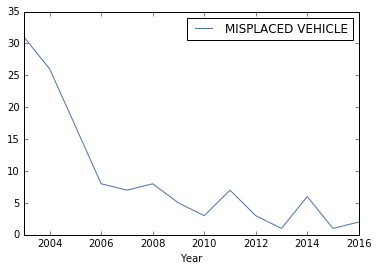

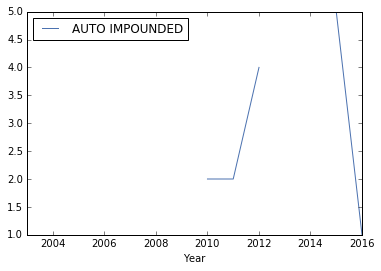

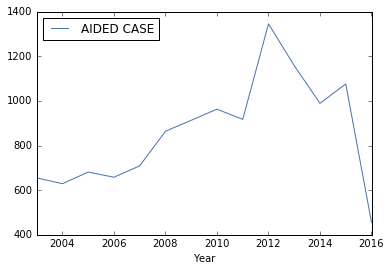

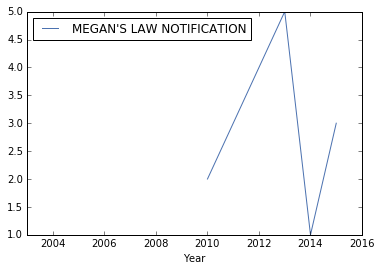

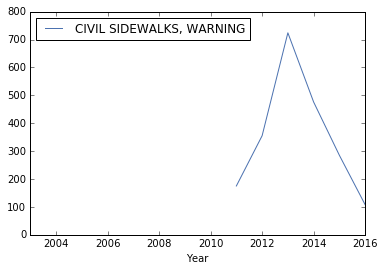

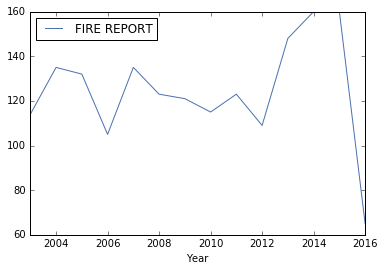

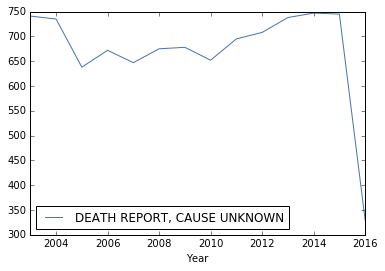

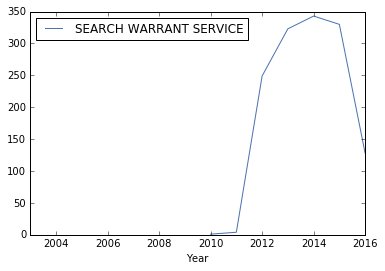

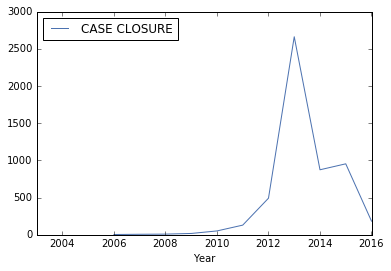

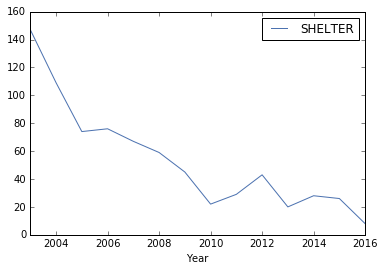

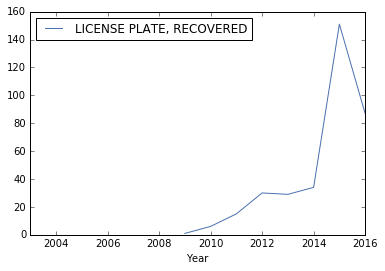

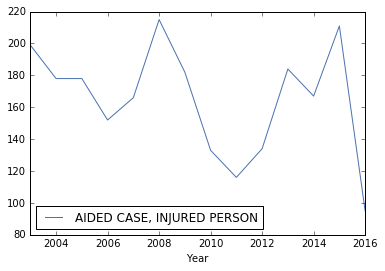

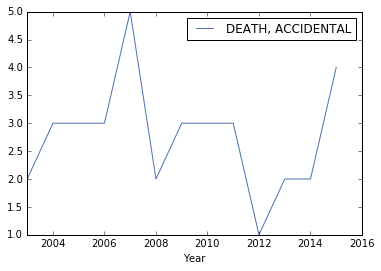

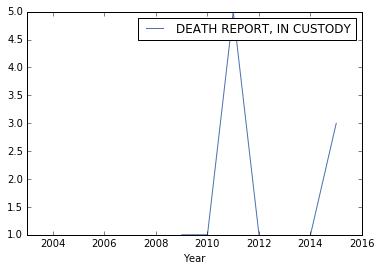

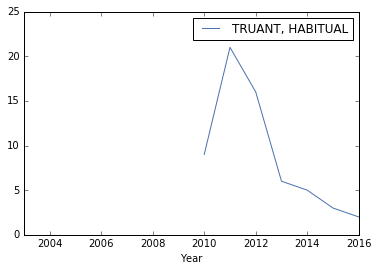

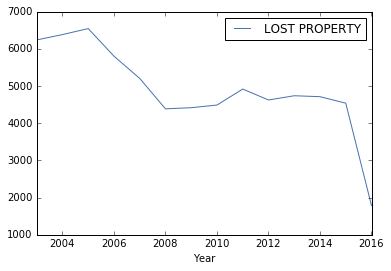

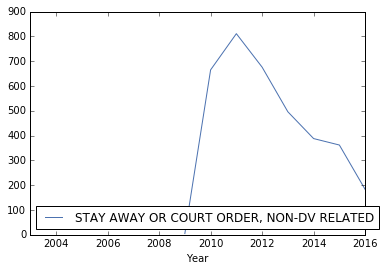

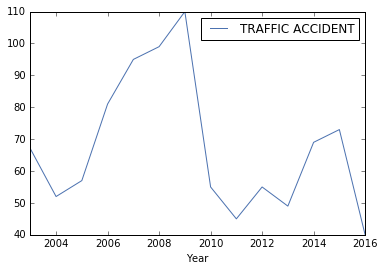

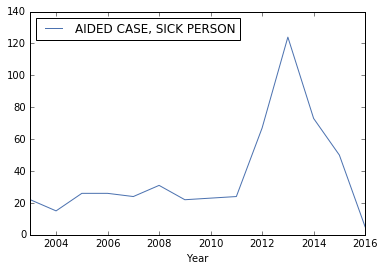

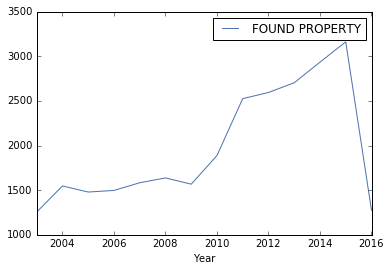

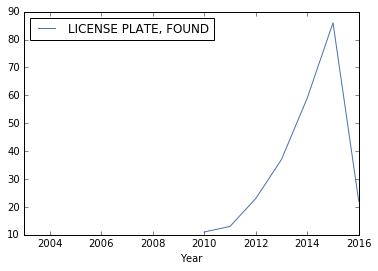

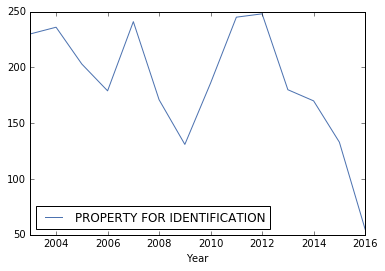

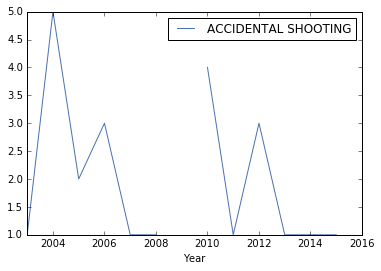

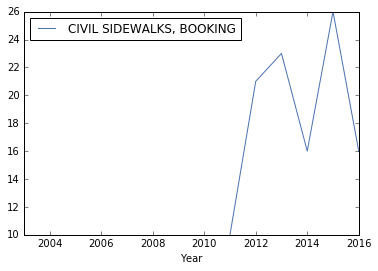

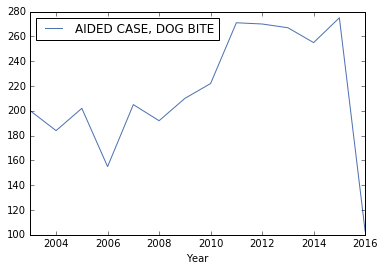

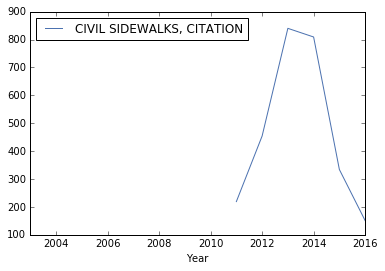

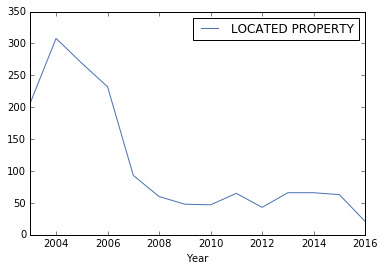

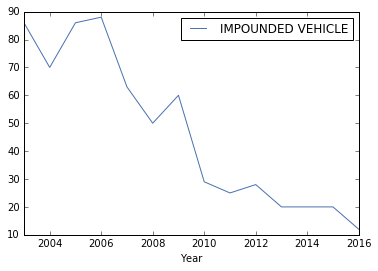

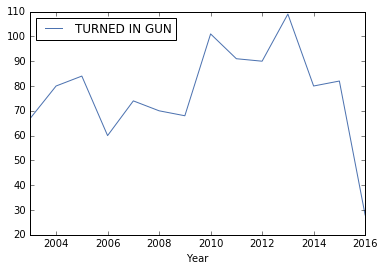

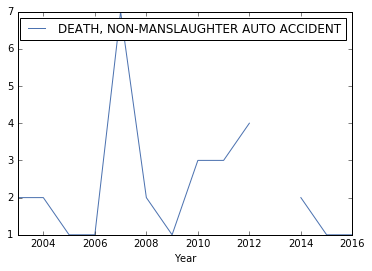

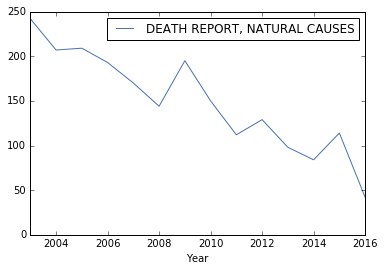

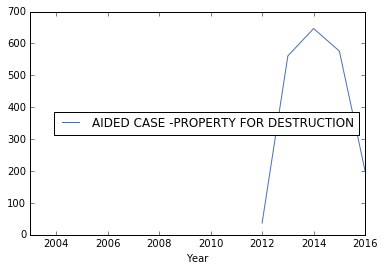

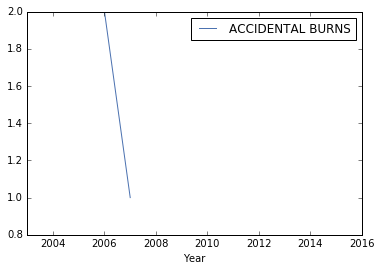

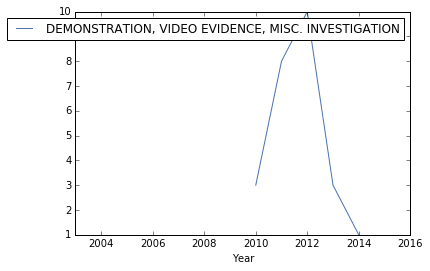

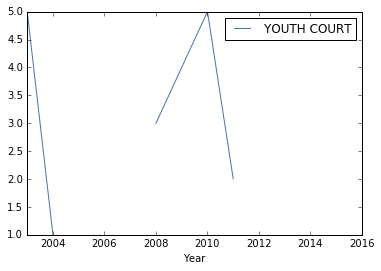

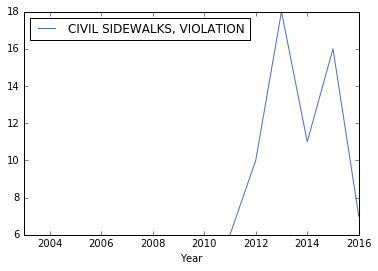

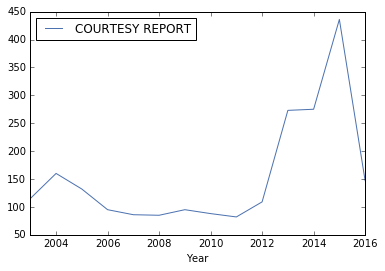

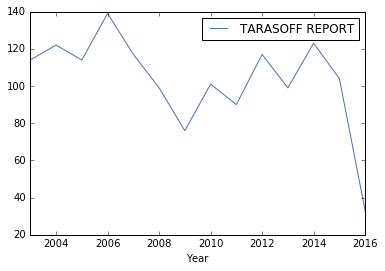

In [28]:
for category in non_criminal_categories:
    non_crim_df.plot(kind = 'line', x = 'Year', y = category)

## 5) How frequently do incidents happen in different PdDistricts?

In [29]:
df.columns

Index(['IncidntNum', 'Category', 'Descript', 'DayOfWeek', 'Date', 'Time',
       'PdDistrict', 'Resolution', 'Address', 'X', 'Y', 'Location', 'Year'],
      dtype='object')

In [30]:
df['PdDistrict'].value_counts()

SOUTHERN      345417
MISSION       259389
NORTHERN      233234
BAYVIEW       194274
CENTRAL       190341
TENDERLOIN    174437
INGLESIDE     172218
TARAVAL       144527
PARK          109458
RICHMOND       99522
Name: PdDistrict, dtype: int64

In [31]:
df['Year'].describe()

count     1922818
unique         14
top          2015
freq       156007
Name: Year, dtype: object

In [32]:
# times per year
df['PdDistrict'].value_counts() / len(df['Year'].unique())

SOUTHERN      24672.642857
MISSION       18527.785714
NORTHERN      16659.571429
BAYVIEW       13876.714286
CENTRAL       13595.785714
TENDERLOIN    12459.785714
INGLESIDE     12301.285714
TARAVAL       10323.357143
PARK           7818.428571
RICHMOND       7108.714286
Name: PdDistrict, dtype: float64

## 6) For each year, which PdDistrict had the most incidents?

In [33]:
for year in years:
    print(year)
    print(df[df['Year'] == str(year)]['PdDistrict'].value_counts().head(1))

2003
SOUTHERN    25692
Name: PdDistrict, dtype: int64
2004
SOUTHERN    24551
Name: PdDistrict, dtype: int64
2005
SOUTHERN    23086
Name: PdDistrict, dtype: int64
2006
SOUTHERN    23325
Name: PdDistrict, dtype: int64
2007
SOUTHERN    24175
Name: PdDistrict, dtype: int64
2008
SOUTHERN    24153
Name: PdDistrict, dtype: int64
2009
SOUTHERN    24409
Name: PdDistrict, dtype: int64
2010
SOUTHERN    26049
Name: PdDistrict, dtype: int64
2011
SOUTHERN    24708
Name: PdDistrict, dtype: int64
2012
SOUTHERN    25890
Name: PdDistrict, dtype: int64
2013
SOUTHERN    29240
Name: PdDistrict, dtype: int64
2014
SOUTHERN    28869
Name: PdDistrict, dtype: int64
2015
SOUTHERN    30001
Name: PdDistrict, dtype: int64
2016
SOUTHERN    11269
Name: PdDistrict, dtype: int64


### Why does Southern always have the most incidents?

## 7) The second most?

In [34]:
for year in years:
    print(year)
    print(df[df['Year'] == str(year)]['PdDistrict'].value_counts().head(2))

2003
SOUTHERN    25692
MISSION     21163
Name: PdDistrict, dtype: int64
2004
SOUTHERN    24551
MISSION     21029
Name: PdDistrict, dtype: int64
2005
SOUTHERN    23086
MISSION     19560
Name: PdDistrict, dtype: int64
2006
SOUTHERN    23325
MISSION     18916
Name: PdDistrict, dtype: int64
2007
SOUTHERN    24175
MISSION     18434
Name: PdDistrict, dtype: int64
2008
SOUTHERN    24153
MISSION     19721
Name: PdDistrict, dtype: int64
2009
SOUTHERN    24409
MISSION     19117
Name: PdDistrict, dtype: int64
2010
SOUTHERN    26049
MISSION     18121
Name: PdDistrict, dtype: int64
2011
SOUTHERN    24708
MISSION     18237
Name: PdDistrict, dtype: int64
2012
SOUTHERN    25890
MISSION     18786
Name: PdDistrict, dtype: int64
2013
SOUTHERN    29240
MISSION     21157
Name: PdDistrict, dtype: int64
2014
SOUTHERN    28869
MISSION     19441
Name: PdDistrict, dtype: int64
2015
SOUTHERN    30001
NORTHERN    20031
Name: PdDistrict, dtype: int64
2016
SOUTHERN    11269
NORTHERN     7991
Name: PdDistrict, dtype

### Almost always the Mission until recently.

## 8) How has the number of incidents reported changed over the years?

In [35]:
df['Year'].value_counts()

2015    156007
2013    152811
2014    150150
2003    149176
2004    148148
2005    142186
2008    141311
2012    140856
2009    139860
2006    137853
2007    137639
2010    133525
2011    132699
2016     60597
Name: Year, dtype: int64

In [36]:
incidents_per_year_dict = {}
incidents_per_year_list = []
years = list(range(2003, 2017))

for year in years:
    incidents_per_year_dict['Year'] = year
    incidents_per_year_dict['Number of Incidents'] = len(df[df['Year'] == str(year)])
    incidents_per_year_list.append(incidents_per_year_dict)
    incidents_per_year_dict = {}
incidents_per_year_list

[{'Number of Incidents': 149176, 'Year': 2003},
 {'Number of Incidents': 148148, 'Year': 2004},
 {'Number of Incidents': 142186, 'Year': 2005},
 {'Number of Incidents': 137853, 'Year': 2006},
 {'Number of Incidents': 137639, 'Year': 2007},
 {'Number of Incidents': 141311, 'Year': 2008},
 {'Number of Incidents': 139860, 'Year': 2009},
 {'Number of Incidents': 133525, 'Year': 2010},
 {'Number of Incidents': 132699, 'Year': 2011},
 {'Number of Incidents': 140856, 'Year': 2012},
 {'Number of Incidents': 152811, 'Year': 2013},
 {'Number of Incidents': 150150, 'Year': 2014},
 {'Number of Incidents': 156007, 'Year': 2015},
 {'Number of Incidents': 60597, 'Year': 2016}]

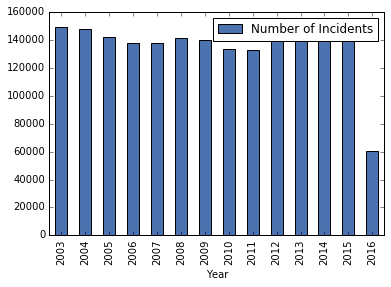

In [37]:
incidents_per_year_df = pd.DataFrame(incidents_per_year_list)
incidents_per_year_df.plot(kind = 'bar', x = 'Year', y = 'Number of Incidents')

## 9) What time of day do most crimes happen?

In [38]:
df.columns

Index(['IncidntNum', 'Category', 'Descript', 'DayOfWeek', 'Date', 'Time',
       'PdDistrict', 'Resolution', 'Address', 'X', 'Y', 'Location', 'Year'],
      dtype='object')

In [39]:
df.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,Year
0,110914565,WARRANTS,WARRANT ARREST,Friday,05/29/2015 12:00:00 AM,16:42,SOUTHERN,"ARREST, BOOKED",BRYANT ST / 8TH ST,-122.406971,37.772527,"(37.7725273607571, -122.406970988225)",2015
1,120789988,MISSING PERSON,FOUND PERSON,Monday,05/16/2016 12:00:00 AM,00:41,INGLESIDE,NONE,WOOLSEY ST / UNIVERSITY ST,-122.412470,37.722659,"(37.7226585129212, -122.412469643631)",2016
2,150020821,ASSAULT,ELDER ADULT OR DEPENDENT ABUSE (NOT EMBEZZLEME...,Friday,01/02/2015 12:00:00 AM,12:00,NORTHERN,NONE,300 Block of FULTON ST,-122.422536,37.778796,"(37.7787958771466, -122.422536478306)",2015
3,150020978,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Wednesday,01/07/2015 12:00:00 AM,19:21,CENTRAL,"ARREST, BOOKED",MONTGOMERY ST / CHESTNUT ST,-122.405178,37.804764,"(37.80476375718, -122.405178220847)",2015
4,150020984,ROBBERY,ROBBERY OF A CHAIN STORE WITH A DANGEROUS WEAPON,Wednesday,01/07/2015 12:00:00 AM,19:27,SOUTHERN,NONE,1100 Block of MARKET ST,-122.413564,37.779514,"(37.779514030063, -122.413564091744)",2015


In [40]:
import re

In [47]:
df['IncidntNum'].head(10).unique()

array([110914565, 120789988, 150020821, 150020978, 150020984, 150020990,
       150021045, 150021073, 150021233, 150021249])

In [59]:
## Troubleshooting the cell below
print(df[['IncidntNum', 'Category']].head(10))
print(df[df['IncidntNum'] == 110914565]['Category'])


# print('')
# print(df[df['IncidntNum'] == 120789988]['Category'])

   IncidntNum        Category
0   110914565        WARRANTS
1   120789988  MISSING PERSON
2   150020821         ASSAULT
3   150020978  OTHER OFFENSES
4   150020984         ROBBERY
5   150020990  OTHER OFFENSES
6   150021045     WEAPON LAWS
7   150021073   LARCENY/THEFT
8   150021233  OTHER OFFENSES
9   150021249   LARCENY/THEFT
0                WARRANTS
1743069    OTHER OFFENSES
Name: Category, dtype: object


In [46]:
incidents = df['IncidntNum'].head(10).unique()
time_list = []
time_dict = {}
for incident in incidents:
    time_dict['Category'] = df[df['IncidntNum'] == incident]['Category'][0]
#     time_dict['Time'] = df[df['IncidntNum'] == incident]['Time'][0]
    print(time_dict)
    time_dict = {}
# times = df[['Category', 'Time']].to_dict()
# times

{'Category': 'WARRANTS'}


KeyError: 0

## 10) What time of day does each type of incident usually happen?

## 11) What types of resolutions are there?

## 12) How frequently does each occur?

## 13) What percent of each type of crime goes unsolved?

## 14) Group by year and make graphs for each.

## 15) This year, what types of incidents are most popular in each district?

## 16) For the most popular type of incident in Park District, how has its frequency changed over the years (in times/month, since this year isn't over).

## Non-Data Questions:
* Which incident categories are violent?
* Which incident categories are actually successes (things closed)
* Which crime categories are actually important? 

# Problematic Things

* Making multiple graphs
* Replacing NaN with another value
* How to make graphs look better! Illustrator?